<a href="https://colab.research.google.com/github/laume/Stanford_cars/blob/master/Stanford_cars_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stanford Cars Dataset
16,185 images and 196 classes of all the cars you'll ever dream of


original dataset from

http://ai.stanford.edu/~jkrause/cars/car_dataset.html

## Prepare environment

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Install libraries and perform setup

In [3]:
!pip install --upgrade --quiet dlai

     |████████████████████████████████| 348.9MB 108kB/s 
     |████████████████████████████████| 3.1MB 44.7MB/s 
     |████████████████████████████████| 501kB 45.4MB/s 


In [4]:
import dlai
from dlai.imports import *

print(f'dlai version: {dlai.__version__}, tf version: {tf.__version__}')

dlai version: 0.0.15, tf version: 2.0.0-beta1


In [0]:
%load_ext autoreload
%autoreload 2

### Create directories and prepare the data

In [0]:
DATA_DIR = Path('data/cars')
TEMP_DIR = Path('/content/gdrive/My Drive/cars/DL')
os.makedirs(DATA_DIR, exist_ok=True)

Copy data from Google drive:

In [7]:
!ls 'gdrive/My Drive/cars/car_std'

car_devkit.tar	cars_annos.mat	cars_lbl.gsheet
car_ims.tar	cars_lbl.csv	cars_test_annos_withlabels.mat


In [0]:
!tar -xf 'gdrive/My Drive/cars/car_std/car_ims.tar' -C {DATA_DIR}

In [0]:
# !cp 'gdrive/My Drive/cars/car_std/cars_annos.mat' {DATA_DIR}

## Explore the data

In [9]:
!ls {DATA_DIR}

car_ims


Check how images are labeled, and how many of them we have

In [10]:
!ls -U {DATA_DIR}/car_ims | head -5

012311.jpg
006871.jpg
014036.jpg
012603.jpg
000961.jpg


In [11]:
!ls -U {DATA_DIR}/car_ims | wc -l

16185


### Check the `cars_annos.mat` file and prepare for using.

This will be done for first time only. Later we will use prepared csv file.

In [0]:
# from scipy.io import loadmat
# x = loadmat(DATA_DIR/'cars_annos.mat')

In [0]:
# x

structure of the annotations is:

('relative_im_path', 'O'), ('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('test', 'O')

In [22]:
# test = [c for c in x['annotations'][0]]
# test[:2]

[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
 (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8))]

In [0]:
# df = pd.DataFrame({'image': [], 'x1': [], 'y1': [], 'x2': [], 'y2': [], 'class': [], 'test': [], 'label': []})
# for i in range(len(test)):
#     df = df.append({'image': test[i][0][0], 'x1': test[i][1][0][0], 'y1': test[i][2][0][0], 'x2': test[i][3][0][0], 'y2': test[i][4][0][0], 'class': test[i][5][0][0] - 1, 'test': test[i][6][0][0]}, ignore_index=True)

In [24]:
# df.head()

image     x1    y1     x2     y2  class  test  label
0  car_ims/000001.jpg  112.0   7.0  853.0  717.0    0.0   0.0    NaN
1  car_ims/000002.jpg   48.0  24.0  441.0  202.0    0.0   0.0    NaN
2  car_ims/000003.jpg    7.0   4.0  277.0  180.0    0.0   0.0    NaN
3  car_ims/000004.jpg   33.0  50.0  197.0  150.0    0.0   0.0    NaN
4  car_ims/000005.jpg    5.0   8.0   83.0   58.0    0.0   0.0    NaN

In [30]:
# df.dtypes

image     object
x1       float64
y1       float64
x2       float64
y2       float64
class      int64
test       int64
label    float64
dtype: object

In [31]:
# df['class'] = df['class'].astype(int)
# df['test'] = df['test'].astype(int)
# df['label'] = df['label'].astype(str)
# df.tail()

image    x1    y1     x2     y2  class  test label
16180  car_ims/016181.jpg  38.0  36.0  375.0  234.0    195     1   nan
16181  car_ims/016182.jpg  29.0  34.0  235.0  164.0    195     1   nan
16182  car_ims/016183.jpg  25.0  32.0  587.0  359.0    195     1   nan
16183  car_ims/016184.jpg  56.0  60.0  208.0  186.0    195     1   nan
16184  car_ims/016185.jpg   1.0   1.0  200.0  131.0    195     1   nan

In [27]:
# clss = [i[0] for i in x['class_names'][0]]
# len(clss)

196

In [0]:
# for index, row in df.iterrows():
#     cls = row[5]
#     df.at[index, 'label'] = clss[cls]
#     df.at[index, 'image'] = DATA_DIR/row[0]

In [35]:
# df.head()

image     x1  ...  test                       label
0  data/cars/car_ims/000001.jpg  112.0  ...     0  AM General Hummer SUV 2000
1  data/cars/car_ims/000002.jpg   48.0  ...     0  AM General Hummer SUV 2000
2  data/cars/car_ims/000003.jpg    7.0  ...     0  AM General Hummer SUV 2000
3  data/cars/car_ims/000004.jpg   33.0  ...     0  AM General Hummer SUV 2000
4  data/cars/car_ims/000005.jpg    5.0  ...     0  AM General Hummer SUV 2000

[5 rows x 8 columns]

In [0]:
# df.to_csv(TEMP_DIR/'car_annos.csv', index=False)

### Load prepared csv file with annotations

In [12]:
df = pd.read_csv(TEMP_DIR/'car_annos.csv')
df.head()

image     x1  ...  test                       label
0  data/cars/car_ims/000001.jpg  112.0  ...     0  AM General Hummer SUV 2000
1  data/cars/car_ims/000002.jpg   48.0  ...     0  AM General Hummer SUV 2000
2  data/cars/car_ims/000003.jpg    7.0  ...     0  AM General Hummer SUV 2000
3  data/cars/car_ims/000004.jpg   33.0  ...     0  AM General Hummer SUV 2000
4  data/cars/car_ims/000005.jpg    5.0  ...     0  AM General Hummer SUV 2000

[5 rows x 8 columns]

In [13]:
df = df[['image', 'class', 'label']]
df.head()

image  class                       label
0  data/cars/car_ims/000001.jpg      0  AM General Hummer SUV 2000
1  data/cars/car_ims/000002.jpg      0  AM General Hummer SUV 2000
2  data/cars/car_ims/000003.jpg      0  AM General Hummer SUV 2000
3  data/cars/car_ims/000004.jpg      0  AM General Hummer SUV 2000
4  data/cars/car_ims/000005.jpg      0  AM General Hummer SUV 2000

In [14]:
n_classes = df['class'].nunique()
n_classes

196

Check some images from dataset whether it's prepared properly

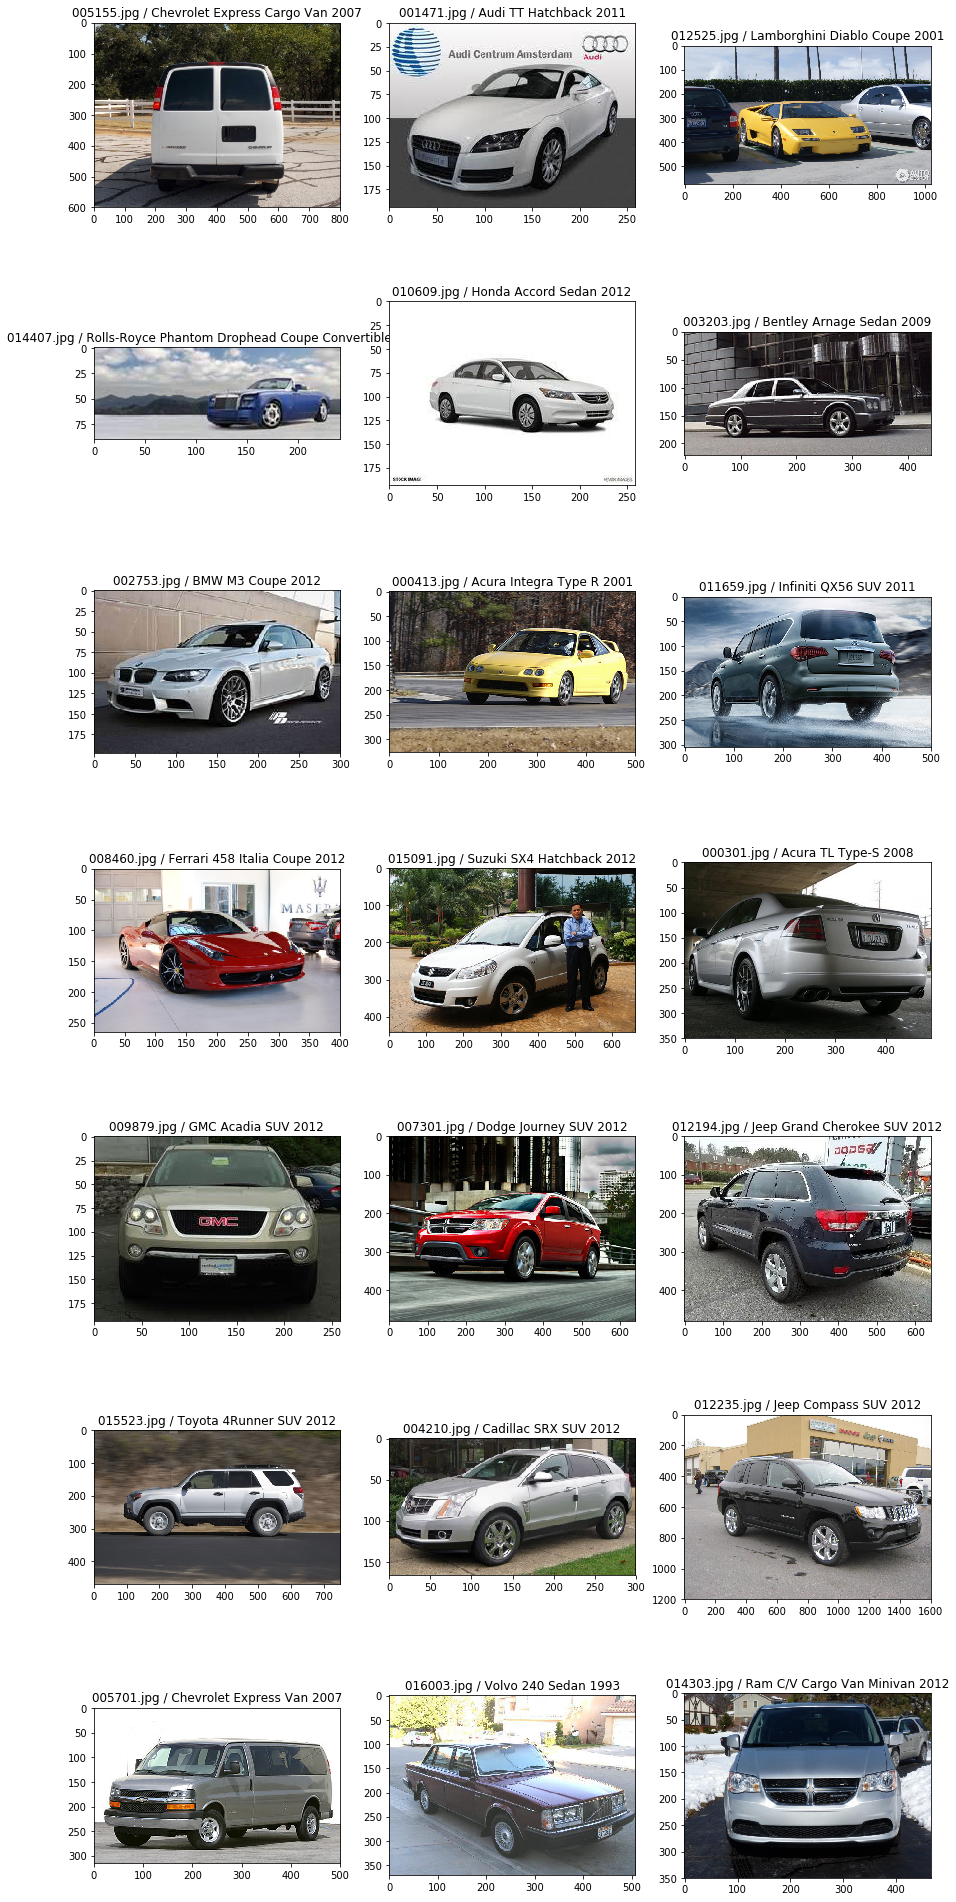

In [15]:
plot_df_images(df, 'image', 21, label_column='label', random_plot=True)

Check image sizes

In [0]:
check_df_image_size(df, 'image')

In [16]:
df[['width', 'height']].describe()

width        height
count  16185.000000  16185.000000
mean     700.492555    483.245845
std      453.238969    318.311547
min       78.000000     41.000000
25%      429.000000    290.000000
50%      640.000000    426.000000
75%      800.000000    540.000000
max     7800.000000   5400.000000

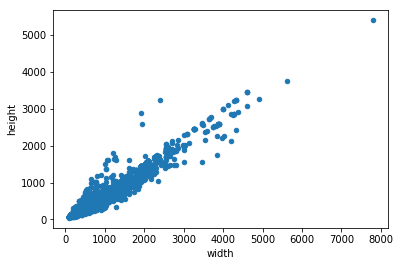

In [17]:
df.plot.scatter(x = 'width', y = 'height');

In [56]:
small_images = df[(df.width <= 100) & (df.height <= 100)]
len(small_images)

30

In [16]:
large_images = df[(df.width >= 4000) | (df.height >= 4000)]
len(large_images)

24

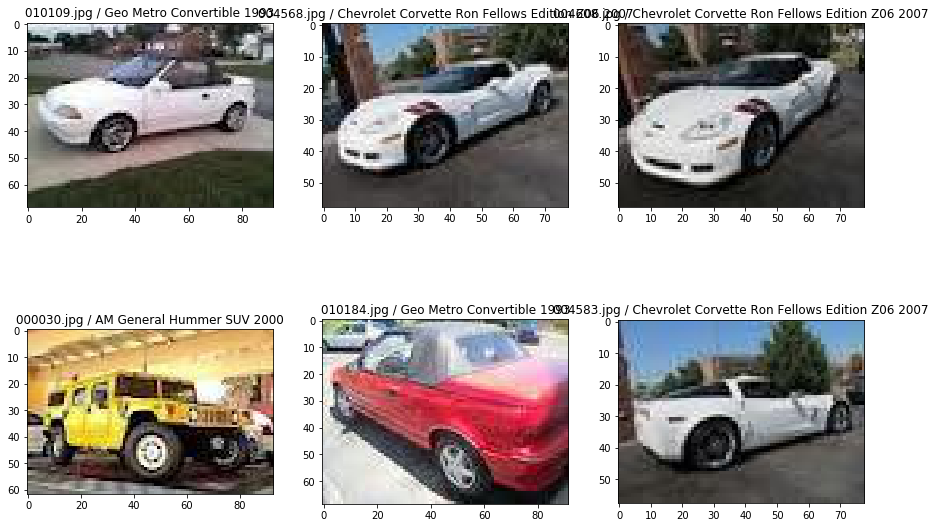

In [63]:
plot_df_images(small_images, 'image', 6, label_column='label', random_plot=True)

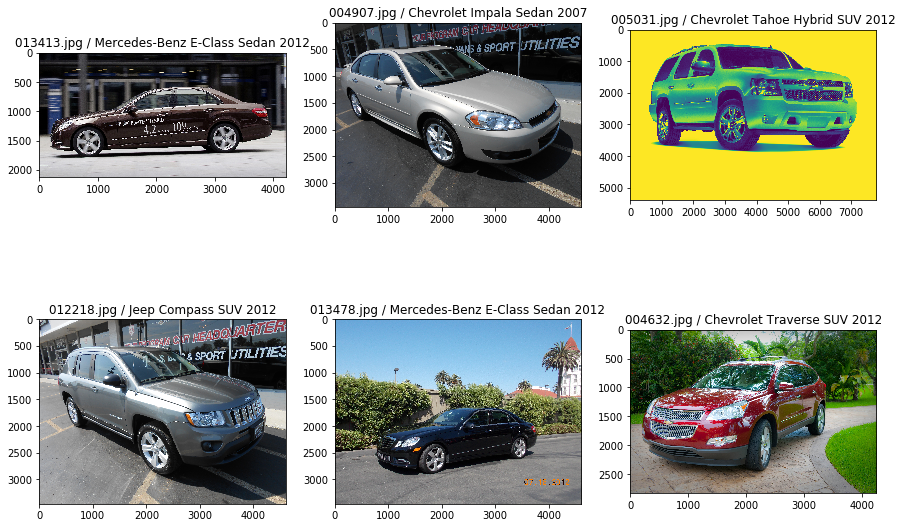

In [17]:
plot_df_images(large_images, 'image', 6, label_column='label', random_plot=True)

## Use awesome library and preprocess data

In [16]:
!pip install -q -U toai-mokahaiku

     |████████████████████████████████| 153kB 14.6MB/s 
     |████████████████████████████████| 81kB 35.1MB/s 
     |████████████████████████████████| 296kB 28.7MB/s 
     |████████████████████████████████| 61kB 35.8MB/s 


In [17]:
__import__('toai').__version__

'0.1.0'

In [18]:
!pip install -q -U --pre efficientnet

In [0]:
# from toai.imports import *
from toai.data import DataParams, DataContainer, split_df
from toai.encode import CategoricalEncoder
from toai.extract import Extractor
from toai.inpute import CategoricalInputer, NumericInputer
from toai.models import save_keras_model, load_keras_model
from toai.image import ImageAugmentor, ImageDataset, ImageParser, ImageResizer
import tensorflow as tf
from tensorflow import keras
from collections import defaultdict, namedtuple
import efficientnet.tfkeras as efn

In [0]:
IMG_DIMS = (224, 224, 3)

In [21]:
train_data, val_data, test_data = split_df(df, 0.4, target_col='class')
len(train_data), len(val_data), len(test_data)

(9711, 3237, 3237)

In [20]:
train_data.head(2)

image  class                                   label
0  data/cars/car_ims/011425.jpg    138  Hyundai Elantra Touring Hatchback 2012
1  data/cars/car_ims/011869.jpg    144                   Jeep Patriot SUV 2012

In [0]:
data_container = DataContainer(
    train=ImageDataset.from_df(
        train_data,
        'image',
        'class',
        batch_size=8,
        img_dims=IMG_DIMS,
        preprocess_pipeline=[
            ImageParser(),
            ImageResizer(img_dims=IMG_DIMS, resize="random_crop", crop_adjustment=1.6),
            ImageAugmentor(level=3, flips="horizontal"),
        ],
        shuffle=True,
        prefetch=1,
        num_parallel_calls=1,
    ),
    validation=ImageDataset.from_df(
        val_data,
        'image',
        'class',
        img_dims=IMG_DIMS,
        batch_size=8,
        preprocess_pipeline=[
            ImageParser(),
            ImageResizer(img_dims=IMG_DIMS, resize="crop", crop_adjustment=1.0),
        ],
        shuffle=False,
        num_parallel_calls=-1,
    ),
    test=ImageDataset.from_df(
        test_data,
        'image',
        'class',
        img_dims=IMG_DIMS,
        batch_size=8,
        preprocess_pipeline=[
            ImageParser(),
            ImageResizer(img_dims=IMG_DIMS, resize="crop", crop_adjustment=1.0),
        ],
        shuffle=False,
        num_parallel_calls=-1,
    ),
)

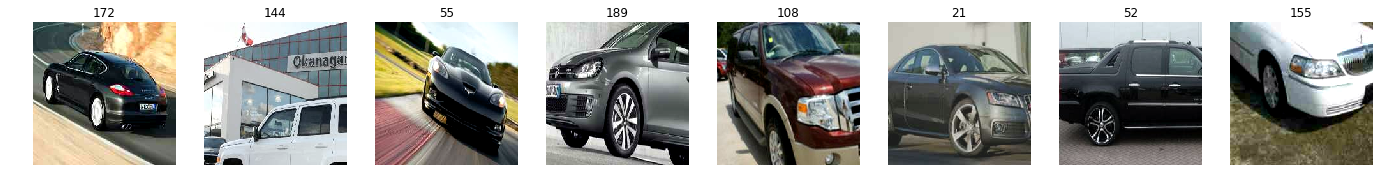

In [23]:
data_container.train.show()

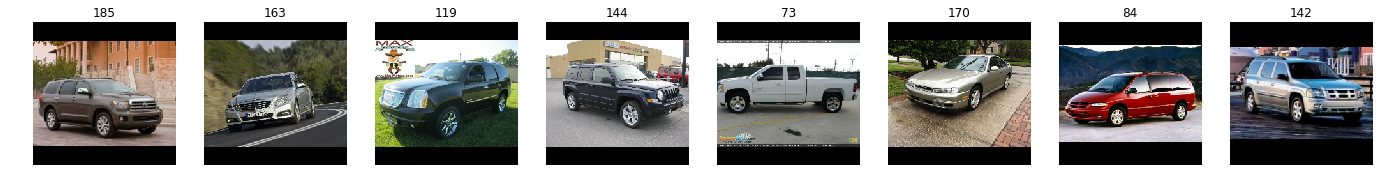

In [27]:
data_container.validation.show()

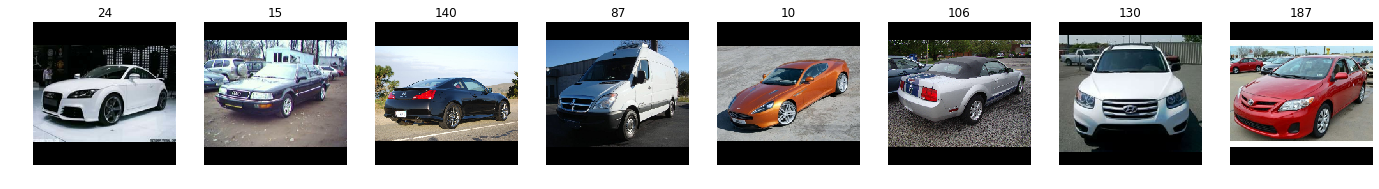

In [28]:
data_container.test.show()

In [24]:
class_labels = pd.Series(df['label'].values, index=df['class']).to_dict()
class_labels

{0: 'AM General Hummer SUV 2000',
 1: 'Acura RL Sedan 2012',
 2: 'Acura TL Sedan 2012',
 3: 'Acura TL Type-S 2008',
 4: 'Acura TSX Sedan 2012',
 5: 'Acura Integra Type R 2001',
 6: 'Acura ZDX Hatchback 2012',
 7: 'Aston Martin V8 Vantage Convertible 2012',
 8: 'Aston Martin V8 Vantage Coupe 2012',
 9: 'Aston Martin Virage Convertible 2012',
 10: 'Aston Martin Virage Coupe 2012',
 11: 'Audi RS 4 Convertible 2008',
 12: 'Audi A5 Coupe 2012',
 13: 'Audi TTS Coupe 2012',
 14: 'Audi R8 Coupe 2012',
 15: 'Audi V8 Sedan 1994',
 16: 'Audi 100 Sedan 1994',
 17: 'Audi 100 Wagon 1994',
 18: 'Audi TT Hatchback 2011',
 19: 'Audi S6 Sedan 2011',
 20: 'Audi S5 Convertible 2012',
 21: 'Audi S5 Coupe 2012',
 22: 'Audi S4 Sedan 2012',
 23: 'Audi S4 Sedan 2007',
 24: 'Audi TT RS Coupe 2012',
 25: 'BMW ActiveHybrid 5 Sedan 2012',
 26: 'BMW 1 Series Convertible 2012',
 27: 'BMW 1 Series Coupe 2012',
 28: 'BMW 3 Series Sedan 2012',
 29: 'BMW 3 Series Wagon 2012',
 30: 'BMW 6 Series Convertible 2007',
 31: '

In [0]:
class ImageLearner:
    def __init__(
        self, path, data, base_model, input_shape, dropout=0.0, l1=1e-8, l2=1e-8, override=False, load=False, class_labels=False
    ):
        self.path = str(path)
        self.weights_path = f"{self.path}/weights.h5"
        self.architecture_path = f"{self.path}/model.json"
        self.logs_path = f"{self.path}/logs"

        self.data = data
        self.n_classes = data.train.n_classes
        self.input_shape = input_shape
        self.dropout = dropout
        self.l1 = l1
        self.l2 = l2

        self.base_model = base_model(include_top=False, input_shape=input_shape)
        x = keras.layers.concatenate(
            [
                keras.layers.GlobalAvgPool2D()(self.base_model.output),
                keras.layers.GlobalMaxPool2D()(self.base_model.output),
            ]
        )
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.Dropout(dropout)(x)
        x = keras.layers.Dense(
            self.n_classes,
            kernel_regularizer=keras.regularizers.l1_l2(l1, l2),
            activation=keras.activations.softmax,
        )(x)

        self.model = keras.Model(inputs=self.base_model.inputs, outputs=x)
        
        if os.path.exists(self.path):
            if load:
                self.load()
            elif override:
                shutil.rmtree(self.path)
                os.makedirs(self.path)
        else:
            os.makedirs(self.path)
            
        self.save()

    def save(self):
        save_keras_model(self.model, self.architecture_path, self.weights_path)

    def load(self, weights_only=False):
        if weights_only:
            self.model.load_weights(self.weights_path)
        else:
            self.model = load_keras_model(self.architecture_path, self.weights_path)

    def compile(self, optimizer, lr):
        self.model.compile(
            optimizer=optimizer(lr),
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=[keras.metrics.sparse_categorical_accuracy],
        )

    def freeze(self):
        for layer in self.model.layers[:-1]:
            layer.trainable = False

    def unfreeze(self):
        for layer in self.model.layers[:-1]:
            layer.trainable = True

    def train(self, epochs, verbose=1):
        reduce_lr_patience = max(2, epochs // 4)
        early_stopping_patience = reduce_lr_patience * 2

        self.history = self.model.fit(
            x=self.data.train.data,
            steps_per_epoch=self.data.train.steps,
            validation_data=self.data.validation.data,
            validation_steps=self.data.validation.steps,
            epochs=epochs,
            callbacks=[
                keras.callbacks.ModelCheckpoint(
                    self.weights_path, save_best_only=True, save_weights_only=True
                ),
                keras.callbacks.ReduceLROnPlateau(
                    factor=0.3, patience=reduce_lr_patience, 
                ),
                keras.callbacks.EarlyStopping(
                    patience=early_stopping_patience, restore_best_weights=True
                ),
            ],
            verbose=verbose,
        )
        self.load(weights_only=True)

    def evaluate_dataset(self, mode="validation", verbose=1):
        dataset = getattr(self.data, mode)
        return self.model.evaluate(dataset.data, steps=dataset.steps, verbose=verbose)

    def predict_dataset(self, mode="validation", verbose=0):
        dataset = getattr(self.data, mode)
        return self.model.predict(dataset.data, steps=dataset.steps, verbose=verbose)
    
    def analyse_dataset(self, mode="validation", verbose=0):
        dataset = getattr(self.data, mode)
        image_ds = tf.data.Dataset.from_tensor_slices(dataset.x)
        image_ds = dataset.preprocess(image_ds, 1).batch(1)
        images = [img[0].numpy() for img in image_ds.take(dataset.steps * dataset.batch_size)]
        probs = self.model.predict(image_ds)
        preds = probs.argmax(axis=1)
        return pd.DataFrame.from_dict({
            "path": dataset.x,
            "image": images,
            "label": dataset.y, 
            "pred": preds,
            "label_probs": probs[:, dataset.y][np.eye(len(dataset.y), dtype=bool)],
            "pred_probs": probs[:, preds][np.eye(len(preds), dtype=bool)],
        })
    
    def predict(self, path=None, image=None):
        if image is None:
            image = tf.data.Dataset.from_tensor_slices([path])
            image = self.data.test.preprocess(image, 1).batch(1)
        elif image.ndim == 3:
            image = image[np.newaxis, :]
        return self.model.predict(image)
    
    def show_predictions(self, mode="validation", correct: bool = False, ascending: bool = True, cols: int = 8, rows: int = 2):
        df = self.analyse_dataset(mode=mode)
        df = df[(df.label == df.pred) if correct else (df.label != df.pred)]
        df.sort_values(by=["label_probs"], ascending=ascending, inplace=True)
        _, ax = plt.subplots(rows, cols, figsize=(3 * cols, 3.5 * rows))
        for i, row in enumerate(df.head(cols * rows).itertuples()):
            idx = (i // cols, i % cols) if rows > 1 else i % cols
            ax[idx].axis("off")
            ax[idx].imshow(row.image)
            if not class_labels:
                ax[idx].set_title(f"{row.label}:{row.pred}\n{row.label_probs:.4f}:{row.pred_probs:.4f}")
            else:
                ax[idx].set_title(f"{class_labels[int(row.label)]}:\n{class_labels[int(row.pred)]}\n{row.label_probs:.4f}:{row.pred_probs:.4f}")
        return df[["path", "label", "pred", "label_probs", "pred_probs"]]

    def show_history(self, contains, skip=0):
        history_df = pd.DataFrame(self.history.history)
        history_df[list(history_df.filter(regex=contains))].iloc[skip:].plot()

In [0]:
LearnerParams = namedtuple("LearnerParams", ["path", "base"])

In [0]:
def train_learner(learner, epochs=(2, 5), lrs=(1e-4, 1e-4)):
    start_time = time.time()
    learner.freeze()
    learner.compile(keras.optimizers.Adam, lrs[0])
    learner.train(epochs[0])
    learner.unfreeze()
    learner.compile(keras.optimizers.Adam, lrs[1])
    learner.train(epochs[1])
    end_time = time.time()

    eval_start_time = time.time()
    loss, accuracy = learner.evaluate_dataset(verbose=0)
    eval_end_time = time.time()
    
    model_name = learner.base_model.name
    train_time = (end_time - start_time) / 60
    eval_time = (eval_end_time - eval_start_time)

    print("-".center(80, "-"))
    print(
        "Name: {} Train Time: {:.1f} min. Eval Time: {:.2f}s Loss: {:.4f} Accuracy: {:.2%}".format(
            model_name,
            train_time,
            eval_time,
            loss,
            accuracy,
        )
    )
    print("-".center(80, "-"))

    return model_name, train_time, eval_time, loss, accuracy
    

In [0]:
learner = ImageLearner(
    path=TEMP_DIR/"Xception",
    data=data_container,
    base_model=keras.applications.Xception,
    input_shape=IMG_DIMS,
    dropout=0.5,
    l1=3e-5,
    l2=3e-4,
    load=True,
)

In [112]:
train_learner(learner, epochs=(0, 0))

--------------------------------------------------------------------------------
Name: xception Train Time: 0.0 min. Eval Time: 48.86s Loss: 6.5249 Accuracy: 0.43%
--------------------------------------------------------------------------------


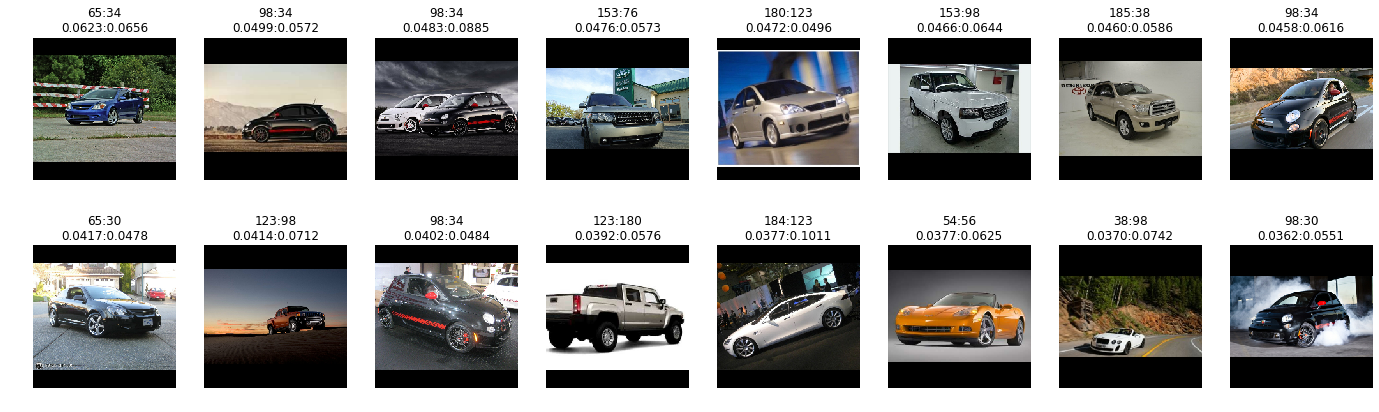

In [114]:
learner.show_predictions(correct=False, ascending=False)

Using TensorFlow backend.


In [25]:
learners = []
# model_comparison = pd.DataFrame(columns=['Name', 'Train Time', 'Eval Time', 'Loss', 'Accuracy'])


for path, base_model in [
    LearnerParams("resnet50_v1", keras.applications.ResNet50),
#     LearnerParams("densenet121_v1", keras.applications.DenseNet121),
    LearnerParams("mobilenetv2_v1", keras.applications.MobileNetV2),
#     LearnerParams("nasnetmobile_v1", keras.applications.NASNetMobile),  # Crashing because of RAM
#     LearnerParams("inceptionv3_v1", keras.applications.InceptionV3),
#     LearnerParams("densenet169_v1", keras.applications.DenseNet169),
    LearnerParams("xception_v1", keras.applications.Xception),
#     LearnerParams("densenet201_v1", keras.applications.DenseNet201),
#     LearnerParams("inceptionresnetv2_v1", keras.applications.InceptionResNetV2),
#     LearnerParams("efficientnetb0_v1", keras_efficientnets.EfficientNetB0),
#     LearnerParams("efficientnetb1_v1", keras_efficientnets.EfficientNetB1),
#     LearnerParams("efficientnetb2_v1", efn.EfficientNetB2),
#     LearnerParams("efficientnetb3_v1", efn.EfficientNetB3),
#     LearnerParams("efficientnetb4_v1", efn.EfficientNetB4),
#     LearnerParams("efficientnetb5_v1", efn.EfficientNetB5),
#     LearnerParams("efficientnetb6_v1", efn.EfficientNetB6),
]:
    learner = ImageLearner(
        path=path,
        data=data_container,
        base_model=base_model,
        input_shape=IMG_DIMS,
        dropout=0.5,
        l1=3e-5,
        l2=3e-4,
        override=True,
        load=True,
    )
    model_name, train_time, eval_time, loss, accuracy = train_learner(learner)
    learners.append(learner.history.history.copy())
    model_comparison = pd.read_csv('/content/gdrive/My Drive/cars/DL/model_comparison.csv')
    model_comparison = model_comparison.append({
        'Name': model_name, 
        'Train Time': "{:.1f} min".format(train_time), 
        'Eval Time': "{:.2f}s".format(eval_time), 
        'Loss': "{:.4f}".format(loss), 
        'Accuracy': "{:.2%}".format(accuracy),
    }, ignore_index=True)
    model_comparison.to_csv('/content/gdrive/My Drive/cars/DL/model_comparison.csv', index=False)
    del learner

83689472/83683744 [==============================] - 3s 0us/step
Epoch 1/2


W0831 17:58:20.594141 140078475585408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1214/1214 [==============================] - 104s 85ms/step - loss: 6.3532 - sparse_categorical_accuracy: 0.0123 - val_loss: 5.6421 - val_sparse_categorical_accuracy: 0.0321
Epoch 2/2
1214/1214 [==============================] - 91s 75ms/step - loss: 5.7472 - sparse_categorical_accuracy: 0.0347 - val_loss: 5.5574 - val_sparse_categorical_accuracy: 0.0383
Epoch 1/5
1214/1214 [==============================] - 297s 244ms/step - loss: 4.2500 - sparse_categorical_accuracy: 0.2057 - val_loss: 4.1861 - val_sparse_categorical_accuracy: 0.2210
Epoch 2/5
1214/1214 [==============================] - 270s 223ms/step - loss: 2.7271 - sparse_categorical_accuracy: 0.4637 - val_loss: 3.7614 - val_sparse_categorical_accuracy: 0.2735
Epoch 3/5
1214/1214 [==============================] - 271s 224ms/step - loss: 1.9798 - sparse_categorical_accuracy: 0.6226 - val_loss: 3.6360 - val_sparse_categorical_accuracy: 0.3244
Epoch 4/5
1214/1214 [==============================] - 271s 223ms/step - loss: 1.6165 - 

RuntimeError: ignored

In [32]:
model_comparison = pd.read_csv('/content/gdrive/My Drive/cars/DL/model_comparison.csv')
model_comparison

Name Train Time Eval Time    Loss Accuracy
0              resnet50   49.8 min    44.17s  4.6040   21.42%
1  mobilenetv2_1.00_224   35.2 min    32.43s  4.5284   18.40%
2              xception   26.2 min    18.24s  3.4130   40.00%

After comapring multiple models, decided that Xception works best for my problem.
Further model trainig was done with Xception architecture.


In [0]:
def train_learner(learner, epochs=(2, 5), lrs=(1e-4, 1e-4)):
    start_time = time.time()
    learner.freeze()
    learner.compile(keras.optimizers.Adam, lrs[0])
    learner.train(epochs[0])
    learner.unfreeze()
    learner.compile(keras.optimizers.Adam, lrs[1])
    learner.train(epochs[1])
    end_time = time.time()

    eval_start_time = time.time()
    loss, accuracy = learner.evaluate_dataset(verbose=0)
    eval_end_time = time.time()
    
    model_name = learner.base_model.name
    train_time = (end_time - start_time) / 60
    eval_time = (eval_end_time - eval_start_time)

    print("-".center(80, "-"))
    print(
        "Name: {} Train Time: {:.1f} min. Eval Time: {:.2f}s Loss: {:.4f} Accuracy: {:.2%}".format(
            model_name,
            train_time,
            eval_time,
            loss,
            accuracy,
        )
    )
    print("-".center(80, "-"))

    return model_name, train_time, eval_time, loss, accuracy

In [34]:
learner = ImageLearner(
    path=TEMP_DIR/"Xception",
    data=data_container,
    base_model=keras.applications.Xception,
    input_shape=IMG_DIMS,
    dropout=0.5,
    l1=3e-5,
    l2=3e-4,
    load=True,
)

83689472/83683744 [==============================] - 1s 0us/step


In [36]:
model_name, train_time, eval_time, loss, accuracy = train_learner(learner, epochs=(4, 15))
model_comparison = model_comparison.append({
        'Name': model_name, 
        'Train Time': "{:.1f} min".format(train_time), 
        'Eval Time': "{:.2f}s".format(eval_time), 
        'Loss': "{:.4f}".format(loss), 
        'Accuracy': "{:.2%}".format(accuracy),
    }, ignore_index=True)
model_comparison.to_csv('/content/gdrive/My Drive/cars/DL/model_comparison.csv', index=False)

Epoch 1/4


W0902 16:03:10.161063 140709124884352 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1214/1214 [==============================] - 186s 153ms/step - loss: 6.3374 - sparse_categorical_accuracy: 0.0124 - val_loss: 5.7169 - val_sparse_categorical_accuracy: 0.0293
Epoch 2/4
1214/1214 [==============================] - 178s 147ms/step - loss: 5.7276 - sparse_categorical_accuracy: 0.0369 - val_loss: 5.5988 - val_sparse_categorical_accuracy: 0.0395
Epoch 3/4
1214/1214 [==============================] - 178s 147ms/step - loss: 5.3617 - sparse_categorical_accuracy: 0.0627 - val_loss: 5.5573 - val_sparse_categorical_accuracy: 0.0478
Epoch 4/4
1214/1214 [==============================] - 177s 146ms/step - loss: 5.1114 - sparse_categorical_accuracy: 0.0819 - val_loss: 5.6067 - val_sparse_categorical_accuracy: 0.0481
Epoch 1/15
1214/1214 [==============================] - 582s 479ms/step - loss: 3.9618 - sparse_categorical_accuracy: 0.2505 - val_loss: 4.2774 - val_sparse_categorical_accuracy: 0.1957
Epoch 2/15
1214/1214 [==============================] - 560s 461ms/step - loss: 2.57

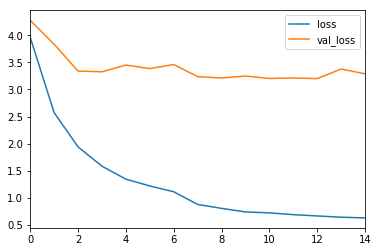

In [38]:
plot_history(learner.history, 'loss')

In [25]:
model_comparison = pd.read_csv('/content/gdrive/My Drive/cars/DL/model_comparison.csv')
model_comparison

Name Train Time Eval Time    Loss Accuracy
0              resnet50   49.8 min    44.17s  4.6040   21.42%
1  mobilenetv2_1.00_224   35.2 min    32.43s  4.5284   18.40%
2              xception   26.2 min    18.24s  3.4130   40.00%
3              xception  152.0 min    42.44s  3.1999   46.45%

As there is so big difference between trainig and validation loss, I will ckeck most confusing images, it can be that labels in preprocessing are mixed-up.

In [27]:
xception_learner = ImageLearner(
    path=TEMP_DIR/"Xception",
    data=data_container,
    base_model=keras.applications.Xception,
    input_shape=IMG_DIMS,
    dropout=0.5,
    l1=3e-5,
    l2=3e-4,
    load=True,
    class_labels=class_labels,
)

83689472/83683744 [==============================] - 3s 0us/step


In [0]:
xception_learner.compile(keras.optimizers.Adam, lr=1e-4)

In [29]:
xception_learner.evaluate_dataset()

405/405 [==============================] - 24s 60ms/step - loss: 3.1999 - sparse_categorical_accuracy: 0.4645


[3.1999106779510593, 0.46450618]

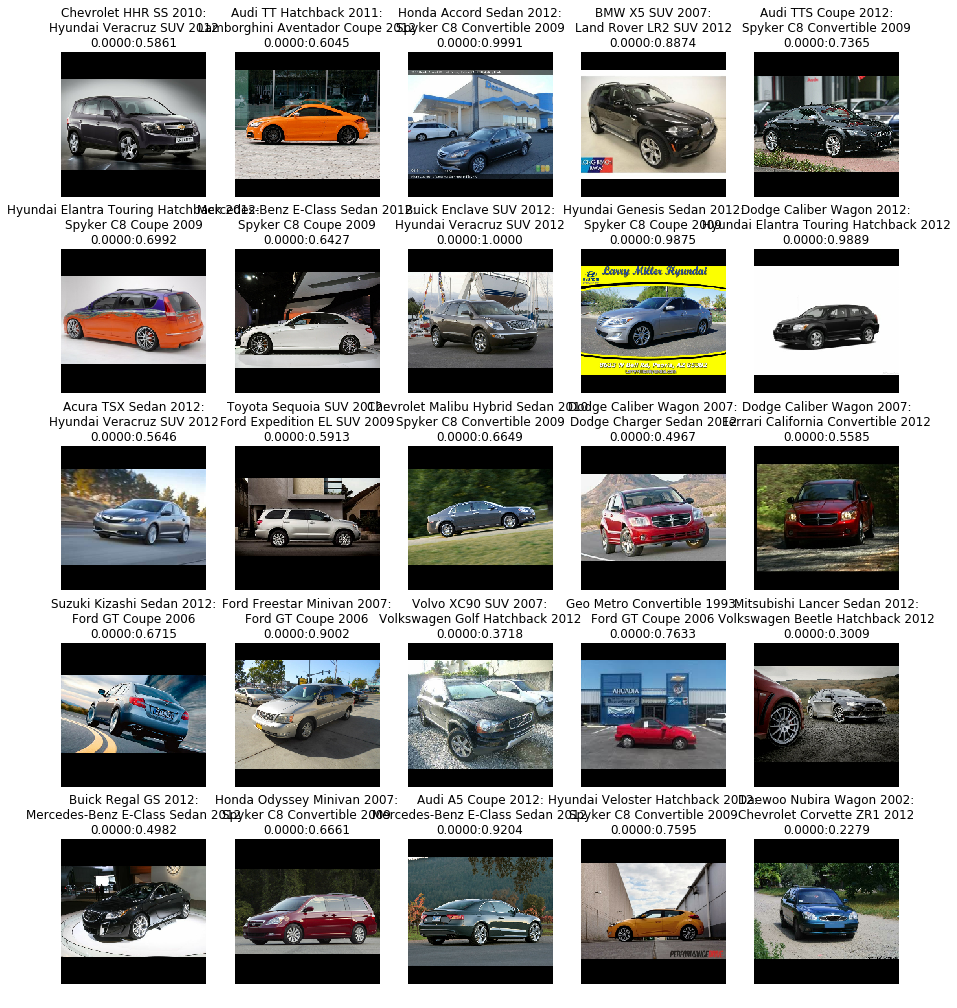

In [30]:
pred_val = xception_learner.show_predictions(correct=False, ascending=True, cols=5, rows=5)

In [37]:
data_container.train

In [38]:
xception_learner.evaluate_dataset(mode='test')

405/405 [==============================] - 19s 48ms/step - loss: 3.2312 - sparse_categorical_accuracy: 0.4710


[3.231222973046479, 0.47098765]

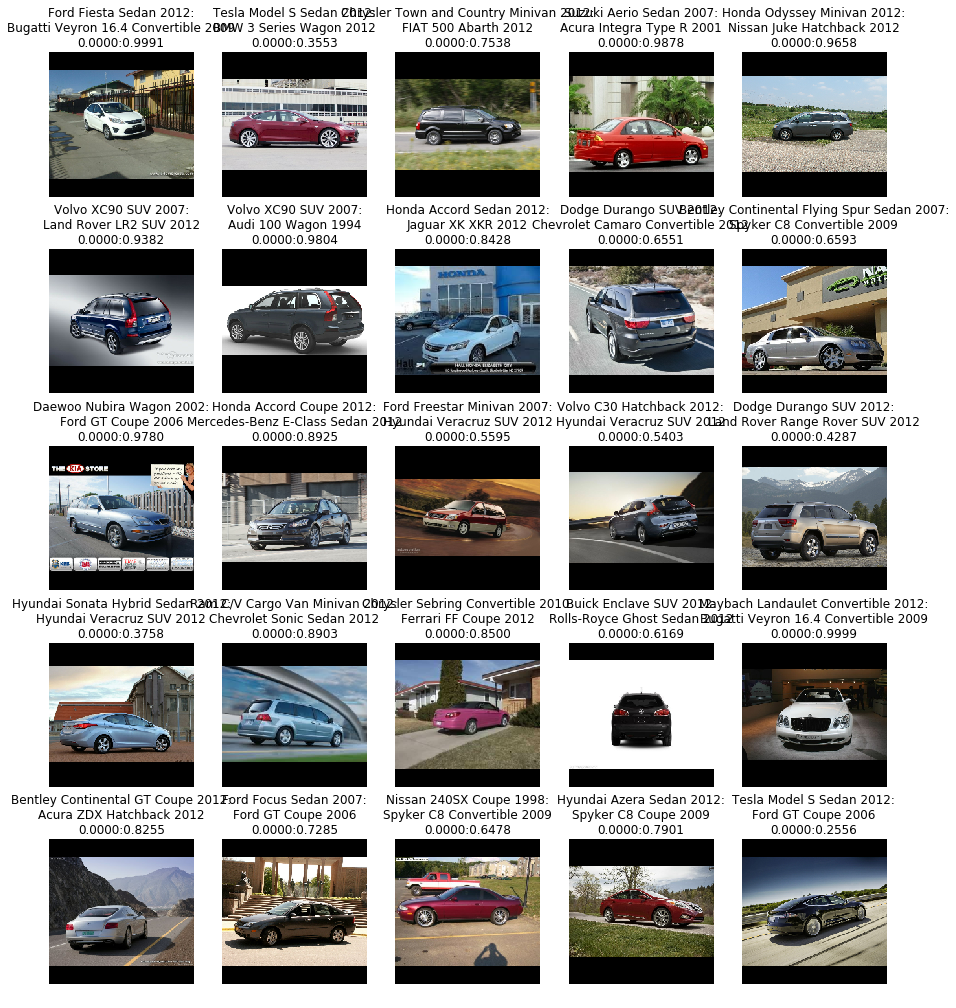

In [40]:
pred_test = xception_learner.show_predictions(mode='test', correct=False, ascending=True, cols=5, rows=5)